<h2><b>Identitas</b>
<h3>
Nama    : Mohammad Aziz Riza<br>
Batch   : MSIB

# <h2><b>Link Tableau</b>

https://public.tableau.com/shared/GBQTBMNR7?:display_count=n&:origin=viz_share_link

# <h2><b>Identifikasi Masalah</b>


<h3><b>Problem Statement :</b> <h4>Mengetahui kandidat mana yang benar-benar ingin bekerja di perusahaan setelah pelatihan atau mencari perubahan pekerjaan
<h3><b>Penjabaran masalah dengan metode 5W+1H :</b> 
<h4><ol>
<li>Apakah kandidat yang berjenis kelamin pria memiliki potensi lebih tinggi untuk bekerja diperusahaan?
<li>Bagaimana jumlah data enrolled university untuk orang orang yang melanjutkan kerja di perusahaan dan mencari perubahan pekerjaan?
<li>Apakah semakin rendah city development index akan semakin tinggi untuk kandidat berpotensi bekerja di perusahaan?
<li>Apakah Semakin Lama Experience Semakin Tinggi Pula Peluang untuk Bekerja di Perusahaan dan Tidak Mencari Pekerjaan Baru?
<li>Apakah data yang yang akan dianalisis berdistribusi normal untuk setiap fitur atau kolom?
<li>Bagaimana tingkat edukasi berpengaruh terhadap potensi bekerja di perusahaan setelah pelatihan?</ol>

# <h2><b>Data Loading

<h4><b>Source Data :</b> https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

In [1]:
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists # Download data dari kaggle

usage: kaggle [-h] [-v]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: unrecognized arguments: Download data dari kaggle


In [2]:
import zipfile

# Tentukan path ke file zip
path_to_zip_file = 'hr-analytics-job-change-of-data-scientists.zip'

# Buka file zip
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    # Membaca daftar file di dalam zip
    file_list = zip_ref.namelist()
    print("Files dalam zip:")
    for file in file_list:
        print(file)

    # Ekstrak semua file ke direktori
    zip_ref.extractall()


Files dalam zip:
aug_test.csv
aug_train.csv
sample_submission.csv


In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Baca file csv ke dalam Pandas DataFrame
df = pd.read_csv("aug_train.csv")

# Tampilkan beberapa baris pertama dari DataFrame
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<h5>Untuk kolom target terdapat nilai 0 dan 1 di mana : <ul>
<li>0 = Tidak mencari perubahaan pekerjaan
<li>1 = Mencari perubahan pekerjaan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<h4><b>Insight :</b><br>
<ol><li>Terdapat 14 kolom pada data dengan jumlah baris data yaitu 19158.
<li>Ada beberapa kolom yang memiliki NaN value yaitu gender, enrolled_university, education_level, major_discipline, experience, company_size, dan last_new_job
<li>Kolom Experience bertipe data object, sehingga dapat diubah ke tipe data integer

# <h2><b>Data Cleaning

<h4>Berdasarkan permasalahan yang ditentukan, kolom kolom yang dibutuhkan untuk analisis yaitu : <ol>
<li>city_development_index<li>gender<li>relevent_experience<li>enrolled_university<li>education_level<li>experience<li>training_hours<li>target</ol>
Sehingga akan menghapus kolom kolom yang tidak diperlukan

In [5]:
df_clean = df[['city_development_index','gender','relevent_experience','enrolled_university','education_level','experience','training_hours','target']]

In [6]:
df_clean

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,5,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,<1,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,>20,8,0.0
...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,14,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,14,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,<1,97,0.0


## <h4><b>Missing Value</b>

In [7]:
print("Missing value pada kolom gender : ", df['gender'].isna().sum())
print("Missing value pada kolom relevent_experience : ", df['relevent_experience'].isna().sum())
print("Missing value pada kolom enrolled_university : ", df['enrolled_university'].isna().sum())
print("Missing value pada kolom education_level : ", df['education_level'].isna().sum())
print("Missing value pada kolom experience : ", df['experience'].isna().sum())
print("Missing value pada kolom training_hours : ", df['training_hours'].isna().sum())
print("Missing value pada kolom target : ", df['target'].isna().sum())

Missing value pada kolom gender :  4508
Missing value pada kolom relevent_experience :  0
Missing value pada kolom enrolled_university :  386
Missing value pada kolom education_level :  460
Missing value pada kolom experience :  65
Missing value pada kolom training_hours :  0
Missing value pada kolom target :  0


<h5>Cek tipe missing value

In [8]:
df_clean[df_clean['gender'].isna()].head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
2,0.624,NaN,No relevent experience,Full time course,Graduate,5,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,<1,52,1.0
5,0.764,NaN,Has relevent experience,Part time course,Graduate,11,24,1.0
9,0.920,NaN,Has relevent experience,no_enrollment,Graduate,17,123,0.0
10,0.624,NaN,No relevent experience,Full time course,High School,2,32,1.0
14,0.624,NaN,No relevent experience,Full time course,High School,5,26,0.0
16,0.920,NaN,Has relevent experience,no_enrollment,Graduate,1,106,0.0
17,0.624,NaN,Has relevent experience,no_enrollment,Graduate,2,7,0.0
18,0.624,NaN,Has relevent experience,no_enrollment,Graduate,7,23,1.0
22,0.804,NaN,Has relevent experience,no_enrollment,Masters,10,48,0.0


In [9]:
df_clean[df_clean['enrolled_university'].isna()].tail(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
18840,0.624,NaN,Has relevent experience,NaN,Masters,5,172,1.0
18851,0.920,Male,Has relevent experience,NaN,Graduate,2,143,0.0
18892,0.887,Male,No relevent experience,NaN,Masters,7,64,0.0
18953,0.624,Male,Has relevent experience,NaN,Graduate,6,58,0.0
18954,0.910,Female,No relevent experience,NaN,Graduate,14,80,1.0
18958,0.624,Male,Has relevent experience,NaN,Graduate,7,152,0.0
18965,0.920,Male,Has relevent experience,NaN,Graduate,>20,50,1.0
19014,0.910,NaN,Has relevent experience,NaN,Masters,8,47,1.0
19109,0.624,NaN,Has relevent experience,NaN,Graduate,4,89,0.0
19120,0.624,NaN,No relevent experience,NaN,Graduate,4,14,1.0


In [10]:
display(df_clean[(df_clean['enrolled_university'].isna()) & (df_clean['gender'] == "Other")].head(1))

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
754,0.84,Other,No relevent experience,NaN,NaN,2,8,0.0


In [11]:
df_clean[df_clean['education_level'].isna()].head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
13,0.624,Male,No relevent experience,NaN,NaN,2,24,0.0
39,0.884,Male,No relevent experience,no_enrollment,NaN,3,106,0.0
69,0.698,NaN,No relevent experience,NaN,NaN,2,228,1.0
136,0.624,Male,No relevent experience,no_enrollment,NaN,3,24,0.0
153,0.910,NaN,Has relevent experience,no_enrollment,NaN,11,4,0.0
171,0.698,NaN,Has relevent experience,NaN,NaN,>20,33,0.0
217,0.624,Male,No relevent experience,no_enrollment,NaN,3,218,0.0
301,0.624,Male,No relevent experience,Full time course,NaN,4,9,1.0
331,0.865,NaN,No relevent experience,no_enrollment,NaN,3,302,0.0
366,0.910,Male,No relevent experience,NaN,NaN,3,24,0.0


In [12]:
display(df_clean[(df_clean['education_level'].isna()) & (df_clean['gender'] == "Female")].head(1))
display(df_clean[(df_clean['education_level'].isna()) & (df_clean['gender'] == "Other")].head(1))

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
3848,0.92,Female,No relevent experience,NaN,NaN,5,31,0.0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
754,0.84,Other,No relevent experience,NaN,NaN,2,8,0.0


In [13]:
df_clean[df_clean['experience'].isna()].head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
135,0.920,NaN,No relevent experience,no_enrollment,Phd,NaN,70,0.0
391,0.698,Male,Has relevent experience,Full time course,Masters,NaN,44,1.0
1589,0.698,NaN,No relevent experience,no_enrollment,NaN,NaN,33,0.0
2727,0.920,NaN,Has relevent experience,no_enrollment,Masters,NaN,70,0.0
2859,0.920,NaN,No relevent experience,Full time course,Graduate,NaN,41,1.0
3086,0.550,NaN,Has relevent experience,Full time course,Primary School,NaN,62,1.0
3564,0.920,NaN,Has relevent experience,no_enrollment,Masters,NaN,34,0.0
3760,0.920,NaN,Has relevent experience,Full time course,Graduate,NaN,24,0.0
4003,0.920,NaN,No relevent experience,no_enrollment,Masters,NaN,103,0.0
4207,0.855,Male,Has relevent experience,no_enrollment,Masters,NaN,96,1.0


In [14]:
display(df_clean[(df_clean['experience'].isna()) & (df['gender'] == "Female")].head(1))
display(df_clean[(df_clean['experience'].isna()) & (df['gender'] == "Other")].head(1))

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
9974,0.624,Female,Has relevent experience,no_enrollment,Masters,NaN,216,0.0


,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
7685,0.698,Other,No relevent experience,NaN,NaN,NaN,49,0.0


<h5><b>Insight : </b> Dari data di atas didapatkan bahwa missing value yang terjadi bertipe data Missing Completely at Random(MCAR). Maka, penanganan yang akan dilakukan yaitu mendrop atau menghapus baris baris yang memiliki mising value

In [15]:
print("Jumlah baris : ",df_clean.shape[0])

Jumlah baris :  19158


In [16]:
df_clean.dropna(inplace=True)

In [17]:
print("Jumlah baris : ",df_clean.shape[0])

Jumlah baris :  14212


<h5>Jumlah baris setelah dilakukan drop missing value yaitu menjadi 14212 dari 19158

In [18]:
df_clean['target'] = df_clean['target'].astype("int64")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<h5>Hasil di atas ditujukkan agar lebih mudah dalam menganalisis di mana:<ol><li>0.0 menjadi 0<li>1.0 menjadi 1

## <h5><b>Transform Data

In [20]:
df_clean.head(2)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,47,0


In [21]:
display(df_clean[df_clean['experience'].str.contains("<")]['experience'].unique())
display(df_clean[df_clean['experience'].str.contains(">")]['experience'].unique())

array(['<1'], dtype=object)

array(['>20'], dtype=object)

<h5>Agar memudahkan dalam melakukan analisis, value dari kolom experience akan diubah menjadi :<ol>
<li>>20 menjadi 20
<li><1 menjadi 1</ol>

Setelah itu diubah tipe datanya menjadi integer

In [22]:
# Mengganti nilai '>20' menjadi '20' dan '<1' menjadi '1' dalam kolom 'experience'
df_clean['experience'] = df_clean['experience'].replace({'>20': '20', '<1': '1'})

In [23]:
df_clean['experience'] = df_clean['experience'].astype("int64")

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14212 entries, 0 to 19156
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  14212 non-null  float64
 1   gender                  14212 non-null  object 
 2   relevent_experience     14212 non-null  object 
 3   enrolled_university     14212 non-null  object 
 4   education_level         14212 non-null  object 
 5   experience              14212 non-null  int64  
 6   training_hours          14212 non-null  int64  
 7   target                  14212 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 999.3+ KB


# <h2><b>Analisis dan perhitungan

<h4>Value pada kolom target yaitu 0 dan 1 di mana :<ol>
<li>0 – Tidak mencari perubahan pekerjaan
<li>1 – Mencari perubahan pekerjaan

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

## <h3><b>Visualisasi

### <h5>1. Apakah kandidat yang berjenis kelamin pria memiliki potensi lebih tinggi untuk bekerja diperusahaan?

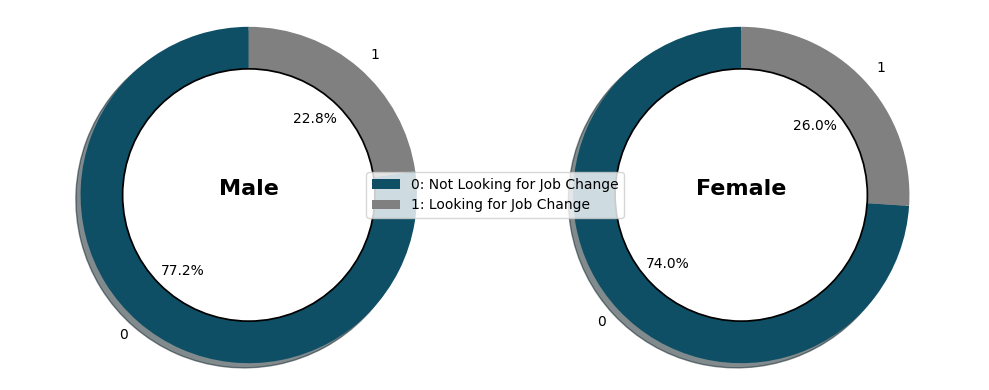

In [26]:
group = df_clean.groupby(['gender','target']).size().reset_index(name="jumlah")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot donut chart untuk gender Male
labels_male = group[group['gender'] == "Male"]['target']
sizes_male = group[group['gender'] == "Male"]['jumlah']
colors_male = ['#0e4f66', 'gray']
explode_male = (0, 0)

axes[0].pie(sizes_male, explode=explode_male, labels=labels_male, colors=colors_male,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].text(0, 0, 'Male', ha='center', fontsize=16, fontweight='bold')
centre_circle_male = plt.Circle((0, 0), 0.75, color='black', fc='white', linewidth=1.25)
axes[0].add_artist(centre_circle_male)
axes[0].axis('equal')

# Plot donut chart untuk gender Female
labels_female = group[group['gender'] == "Female"]['target']
sizes_female = group[group['gender'] == "Female"]['jumlah']
colors_female = ['#0e4f66', 'gray']
explode_female = (0, 0)

axes[1].pie(sizes_female, explode=explode_female, labels=labels_female, colors=colors_female,
            autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].text(0, 0, 'Female', ha='center', fontsize=16, fontweight='bold')
centre_circle_female = plt.Circle((0, 0), 0.75, color='black', fc='white', linewidth=1.25)
axes[1].add_artist(centre_circle_female)
axes[1].axis('equal')

# Tampilkan satu legenda di tengah-tengah
fig.legend(labels=['0: Not Looking for Job Change', '1: Looking for Job Change'], bbox_to_anchor=(0.5, 0.5), loc="center")

plt.tight_layout()
plt.show()

<h5><b>Insight :</b> Dari visualisasi yang dihasilkan, terlihat bahwa Laki laki memiliki potensi lebih tinggi untuk bekerja di perusahaan ketimbang Perempuan atau lainnya sebesar 90%

### <h5>2. Bagaimana jumlah data enrolled university untuk orang orang yang melanjutkan kerja di perusahaan dan mencari pekerjaan baru?

In [56]:
df_clean.groupby(["enrolled_university","target"]).size().reset_index(name="jumlah")

,enrolled_university,target,jumlah
0,Full time course,0,1603
1,Full time course,1,938
2,Part time course,0,677
3,Part time course,1,189
4,no_enrollment,0,8654
5,no_enrollment,1,2151


In [27]:
jumlah = df_clean.groupby(["enrolled_university","target"]).size().reset_index(name="jumlah")

# Menghitung jumlah total dalam setiap kategori 'enrolled_university'
total_per_category = jumlah.groupby("enrolled_university")["jumlah"].transform("sum")

# Menghitung persentase dari jumlah dalam masing-masing kategori
jumlah["persen"] = round((jumlah["jumlah"] / total_per_category) * 100)

jumlah

,enrolled_university,target,jumlah,persen
0,Full time course,0,1603,63.0
1,Full time course,1,938,37.0
2,Part time course,0,677,78.0
3,Part time course,1,189,22.0
4,no_enrollment,0,8654,80.0
5,no_enrollment,1,2151,20.0


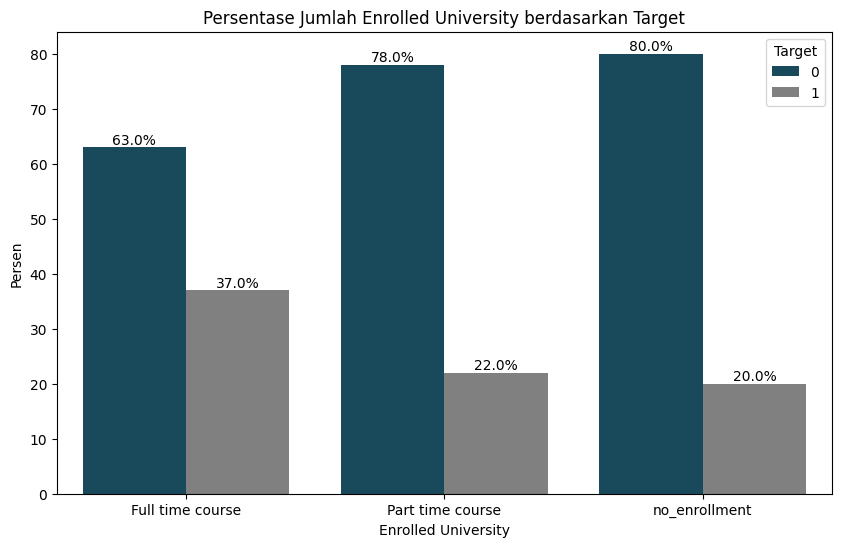

In [28]:
# Definisikan warna untuk setiap kategori target
colors = {0: '#0e4f66', 1: 'gray'}

# Plot bar plot menggunakan seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=jumlah, x="enrolled_university", y="persen", hue="target", palette=colors)

# Menambahkan persentase di dalam bar plot
for p in ax.patches:
    if p.get_height() != 0:  # Memeriksa apakah nilai persentase bukan 0
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Persentase Jumlah Enrolled University berdasarkan Target')
plt.xlabel('Enrolled University')
plt.ylabel('Persen')

# Menampilkan legenda
plt.legend(title="Target", loc="upper right", frameon=True)

# Menampilkan plot
plt.show()


<h5><b>Insight :</b> Jika dilihat dari hasil visualisasi, kandidat dengan enrolled_universitynya "no_enrollment" memiliki persentase paling tinggi untuk bekerja di perusahaan dan kandidat dengan enrolled_universitynya "Full time course" memiliki persentase paling rendah untuk bekerja di perusahaan

### <h5>3. Apakah semakin rendah city development index akan semakin tinggi untuk kandidat berpotensi bekerja di perusahaan?

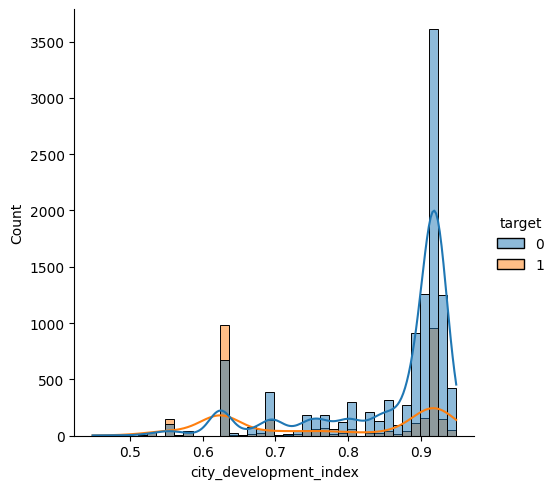

In [29]:
sns.displot(data=df_clean, x="city_development_index", hue="target",kde=True)

<h5><b>Insight :</b>Dari visualisasi dapat ditarik kesimpulan, yaitu:<ol>
<li>city_development_index di bawah 0.7 memiliki potensi untuk kandidat bekerja di perusahaan lebih rendah
<li>city_development_index di atas 0.7 memiliki potensi untuk kandidat bekerja di perusahaan lebih tinggi
<li>city_development_index di sekitar 0.9 memiliki potensi paling tinggi untuk kandidat bekerja di perusahaan

### <h5>4. Apakah Semakin Lama Experience Semakin Tinggi Pula Peluang untuk Bekerja di Perusahaan dan Tidak Mencari Pekerjaan Baru?

In [30]:
# Load the example car crash dataset
total_experience = df_clean.groupby("experience").size().reset_index(name="jumlah").sort_values("jumlah", ascending=False)
total_berpotensi = df_clean.groupby(['experience','target']).size().reset_index(name="jumlah")
total_berpotensi = total_berpotensi[total_berpotensi['target'] == 0].sort_values("jumlah", ascending=False)

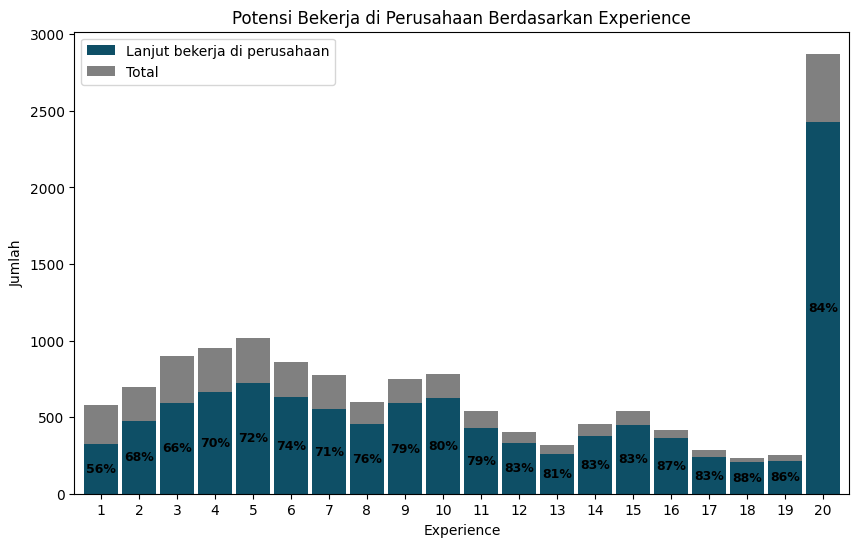

In [31]:
import matplotlib.pyplot as plt

# Mengatur ukuran visualisasi
fig, ax = plt.subplots(figsize=(10, 6))

grouped = df_clean.groupby(['experience','target']).size().reset_index(name="jumlah")

# Data pivot table
pivot = grouped.pivot(index='experience', columns='target', values='jumlah')

# Menghitung total untuk setiap pengalaman
totals = pivot.sum(axis=1)

# Menghitung persentase masing-masing kategori
pivot_percentage = pivot.div(totals, axis=0) * 100

# Membuat bar plot
pivot.plot(kind='bar', stacked=True, width=0.9, ax=ax, color=['#0e4f66', 'gray'])
plt.xlabel('Experience')
plt.ylabel('Jumlah')
plt.title('Potensi Bekerja di Perusahaan Berdasarkan Experience')

# Menambahkan label persentase pada setiap bar
for i in range(len(pivot_percentage)):
    for j in range(len(pivot_percentage.columns)):
        plt.text(i, pivot.iloc[i, j] / 2, f"{pivot_percentage.iloc[i, j]:.0f}%", ha='center', va='center', fontsize=9, fontweight='bold')
        break

plt.legend(labels=['Lanjut bekerja di perusahaan', 'Total'])
plt.xticks(rotation=0)  # Memutar label sumbu-x agar lebih mudah dibaca
plt.show()


<h5><b>Insight :</b> Dari visualisasi yang ditampilkan benar bahwa semakin lama experience semakin tinggi pula persentase untuk bekerja di perusahaan. Di mana mulai dari lama experience 12 tahun ke atas persentasenya pun menaik yaitu 80% ke atas

## <h3><b>Statistik Deskriptif

<h5>5. Apakah data yang yang akan dianalisis berdistribusi normal untuk setiap fitur atau kolom?

In [32]:
df_clean.head(5)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,20,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,47,0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,20,8,0
6,0.920,Male,Has relevent experience,no_enrollment,High School,5,24,0
7,0.762,Male,Has relevent experience,no_enrollment,Graduate,13,18,1


In [33]:
df_clean['relevent_experience'].value_counts()

relevent_experience
Has relevent experience    10697
No relevent experience      3515
Name: count, dtype: int64

In [34]:
df_filter= df_clean[df_clean['target'] == 0]

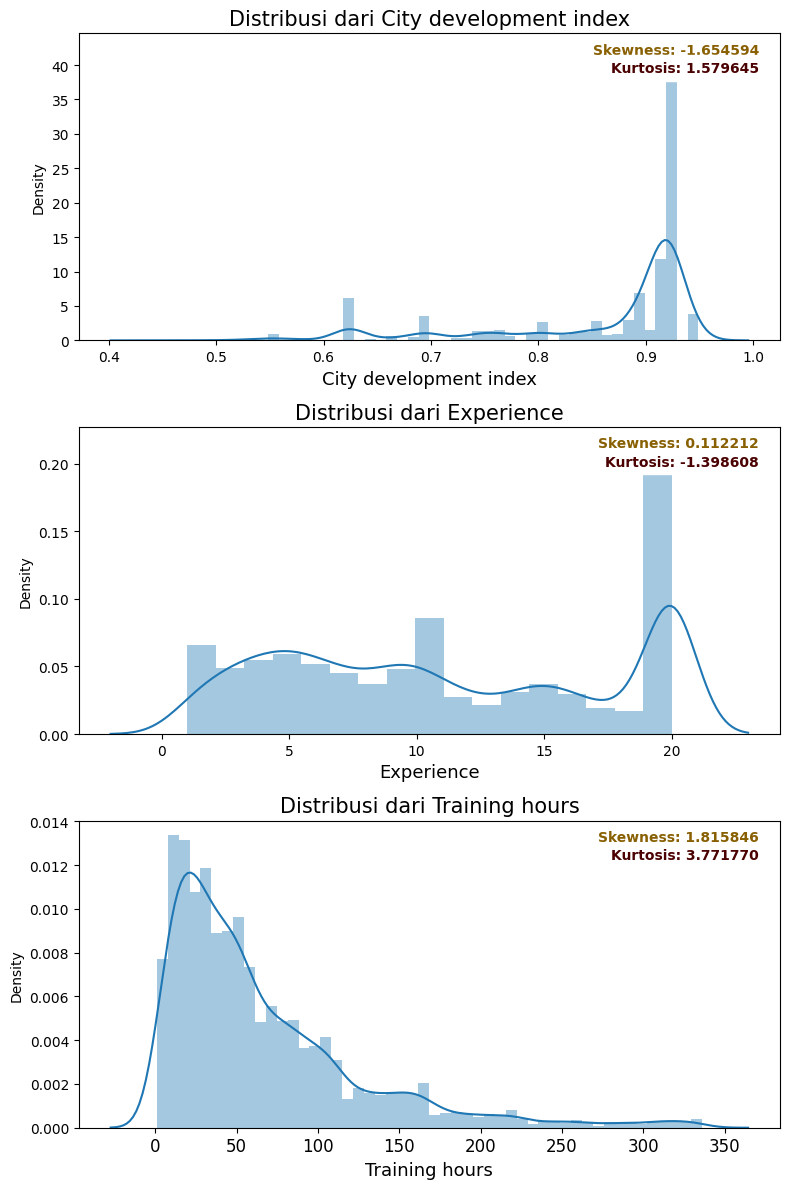

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, figsize=(8, 12))  # Buat subplot dengan 3 baris

# Daftar kolom dan teks yang akan ditampilkan
kolom = ['city_development_index','experience', 'training_hours']
teks_posisi = (0.97, 0.97)  # Posisi teks untuk setiap subplot

for i, kol in enumerate(kolom):
    sns.distplot(df_filter[kol], ax=axes[i])
    
    axes[i].set_title('Distribusi dari ' + kol.replace('_', ' ').capitalize(), fontsize=15, loc='center')
    axes[i].set_xlabel(kol.replace('_', ' ').capitalize(), fontsize=13)
    plt.tick_params(axis='x', which='major', labelsize=12)
    axes[i].yaxis.tick_left()  # where the y axis marks will be
    
    # Tambahkan teks untuk skewness dan kurtosis
    axes[i].text(x=0.97, y=0.97, transform=axes[i].transAxes,
                 s="Skewness: %f" % df_filter[kol].skew(), fontweight='demibold', fontsize=10,
                 verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')
    axes[i].text(x=0.97, y=0.91, transform=axes[i].transAxes,
                 s="Kurtosis: %f" % df_filter[kol].kurt(), fontweight='demibold', fontsize=10,
                 verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:dried blood')

plt.tight_layout()
plt.show()


<h5><b>Insight :</b> Dari city_development hingga training_hours memiliki distribusi yang tidak normal, di mana: <ol>
<li>city_development_index memiliki skewness -1,6 yang berarti data memiliki nilai nilai di bawah rata rata atau di bawah dari 0.9
<li>experience memiliki skewness 0.1 yang berarti hampir simetris dan data bisa dikatakan tersebar secara merata
<li>training_hours memiliki skewness 1,8 yang berarti data memiliki nilai nilai di atas rata rata atau di atas 50 jam

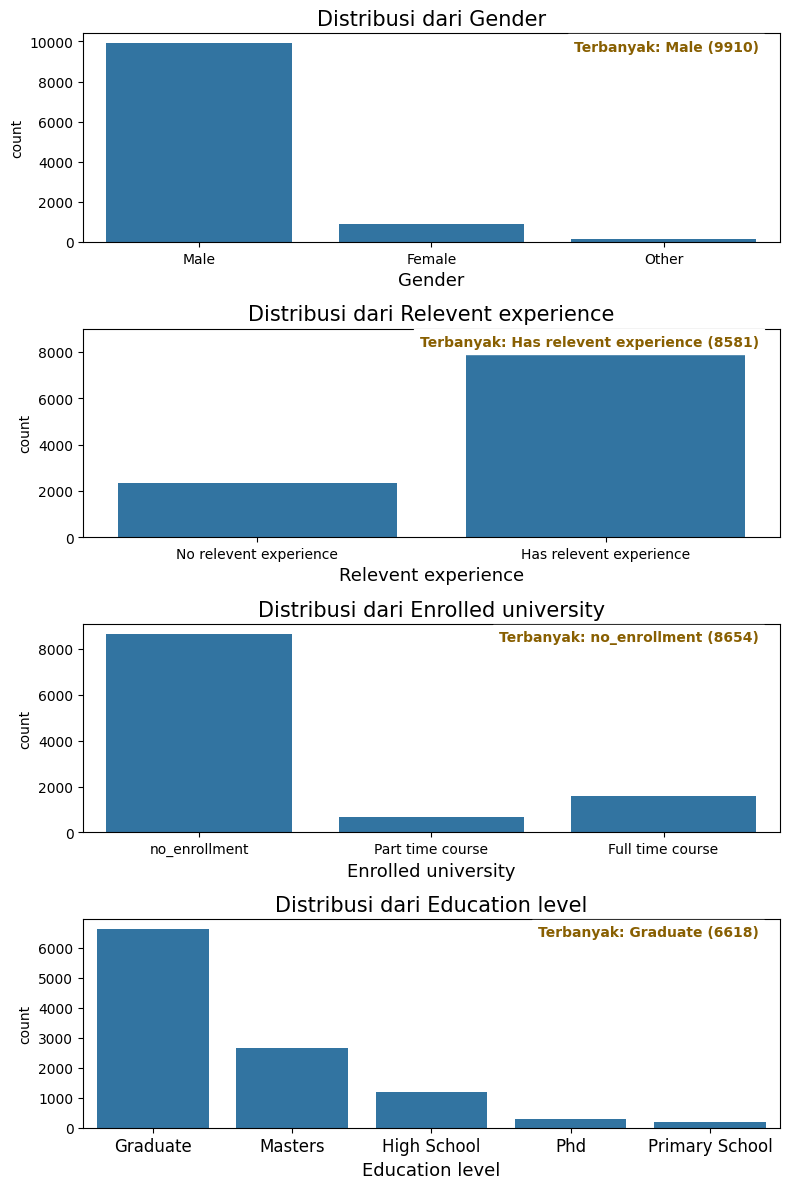

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, figsize=(8, 12))  # Buat subplot dengan 4 baris

# Atur jarak antara visualisasi
plt.subplots_adjust(hspace=0.5)

# Daftar kolom kategori
kategori_kolom = ['gender','relevent_experience','enrolled_university','education_level']

teks_posisi = (0.97, 0.97)  # Posisi teks untuk setiap subplot

for i, kol in enumerate(kategori_kolom):
    sns.countplot(data=df_filter, x=kol, ax=axes[i])
    
    axes[i].set_title('Distribusi dari ' + kol.replace('_', ' ').capitalize(), fontsize=15, loc='center')
    axes[i].set_xlabel(kol.replace('_', ' ').capitalize(), fontsize=13)
    plt.tick_params(axis='x', which='major', labelsize=12)
    axes[i].yaxis.tick_left()  # where the y axis marks will be
    
    # Tambahkan teks untuk kategori terbanyak
    kategori_terbanyak = df_filter[kol].value_counts().idxmax()
    jumlah_terbanyak = df_filter[kol].value_counts().max()
    axes[i].text(x=0.97, y=0.97, transform=axes[i].transAxes,
                 s=f"Terbanyak: {kategori_terbanyak} ({jumlah_terbanyak})", fontweight='demibold', fontsize=10,
                 verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()


<h5><b>Insight :</b> Dari distribusi di atas dapat ditarik kesimpulan untuk kandidat yang memiliki potensi, yaitu : <ol>
<li>Laki laki jauh lebih tinggi jumlahnya untuk bekerja di perusahaan 
<li>Kandidat yang memiliki pengalaman yang sesuai memiliki jumlah yang lebih tinggi untuk bekerja di perusahaan
<li>Kandidat yang tidak mengambil kursus universitas manapun memiliki jumlah lebih tinggi untuk bekerja di perusahaan
<li>Kandidat dengan level edukasinya Graduate memiliki jumlah lebih tinggi untuk bekerja di perusahaan

## <h3><b>Statistik Inferensial

<h5>6. Bagaimana tingkat edukasi berpengaruh terhadap potensi bekerja di perusahaan setelah pelatihan?

<h5>Karna akan melihat korelasi atau bagaimana edukasi(education_level) berpengaruh terhadap potensi pekerjaan(target) maka akan digunakan Chi-Squared Test dikarenakan kolom yang akan digunakan bertipe kategori.<br><br>  
H0: Tidak ada hubungan antara tingkat edukasi dengan potensi bekerja di perusahaan<br>
H1: Terdapat hubungan antara tingkat edukasi dengan potensi bekerja di perusahaan

In [37]:
#Contingency Table
contingency_table = pd.crosstab(df_clean['education_level'],df_clean['target'])
contingency_table

target,0,1
education_level,,
Graduate,6618,2306
High School,1193,275
Masters,2654,633
Phd,283,43
Primary School,186,21


In [38]:
import scipy.stats as stats

res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 1.1162084481236554e-24


<h5>
Dengan Critical valuenya 0.05, maka :
p-val = 1.116 > critical value, sehingga H0 diterima<br>

<b>Kesimpulan:</b><br>
Tidak terdapat hubungan antara tingkat edukasi dengan potensi bekerja di perusahaan


In [58]:
# Ekspor data clean untuk kebutuhan visualisasi di tableau
df_clean.to_csv("data_kandidat.csv", index=False)